In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
from sklearn.datasets import make_blobs

In [4]:
data = pd.read_csv('Mall_Customers.csv')

In [15]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
data = data.set_index('CustomerID')

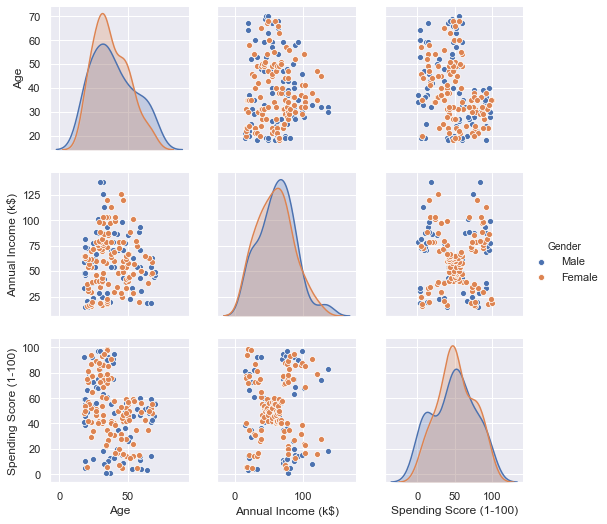

In [20]:
cols = ['Gender','Age','Annual Income (k$)','Spending Score (1-100)']
sns.pairplot(data=data[cols], hue='Gender')

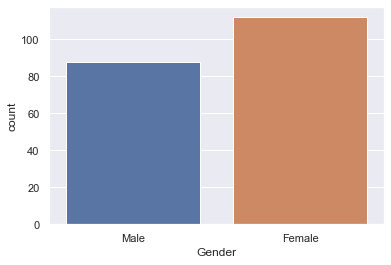

In [21]:
sns.countplot(x='Gender',data=data)

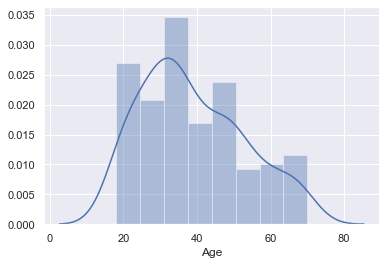

In [22]:
sns.distplot(data['Age'])

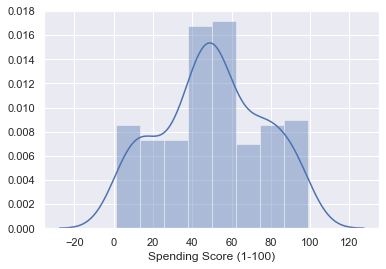

In [24]:
sns.distplot(data['Spending Score (1-100)'])

In [27]:
d = {'Male':1, 'Female':0}
data.Gender = data.Gender.map(d)

In [28]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [30]:
from sklearn.preprocessing import StandardScaler
selected_col_data = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaler.fit(selected_col_data)
scaled_data = scaler.transform(selected_col_data)

In [31]:
from sklearn.cluster import KMeans

In [33]:
score = []
n_list = list(range(2,40))

for n in n_list:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_data)
    score.append(kmeans.inertia_)
    

Text(0, 0.5, 'Error')

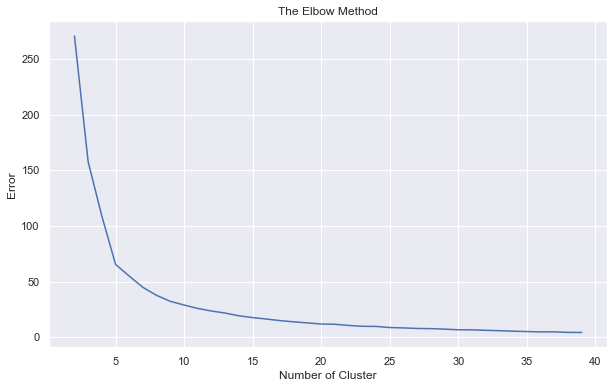

In [34]:
plt.figure(figsize=(10,6))
plt.plot(n_list,score)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Error')

In [35]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [36]:
kmeans.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275]])

In [37]:
kmeans.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [38]:
kmeans.inertia_

65.56840815571681

In [40]:
data_result = data.copy()
data_result['cluster'] = kmeans.labels_

In [42]:
data_result.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,,
1,1,19,15,39,2
2,1,21,15,81,3
3,0,20,16,6,2
4,0,23,16,77,3
5,0,31,17,40,2


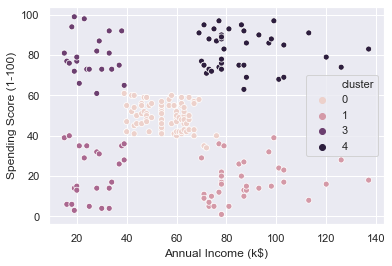

In [44]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data_result, hue='cluster')

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')